In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import datetime as DT


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
topRanking = pd.read_csv('data/2017Ranking.csv')
history_rank= pd.read_csv('data/top100_history.csv')
all_startup_info = pd.read_csv('data/startup.ch 2013 - 2018_corrname.csv')
all_satrtup= pd.read_csv('data/startup.ch_list.csv')
all_year_ranking = pd.read_csv('data/ranked_per_year.csv')

In [3]:
all_satrtup['in2017']= all_satrtup.comps.isin(topRanking.comps) *1
all_satrtup['in2016']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2016.isnull()]) *1
all_satrtup['in2015']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2015.isnull()]) *1
all_satrtup['in2014']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2014.isnull()]) *1
all_satrtup['in2013']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2013.isnull()]) *1
all_satrtup['in2012']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2012.isnull()]) *1
mydata = pd.merge(all_satrtup,all_startup_info.iloc[:,[12,7,8,9]],on='comps')

mydata['age'] =(pd.Timestamp(DT.datetime.now())- pd.to_datetime(mydata['Incorporation.Date'])).astype('<m8[Y]')
mydata[mydata.age<0].age = 0
mydata.drop('Incorporation.Date',axis=1,inplace=True)
mydata['Number.of.Employees'][mydata['Number.of.Employees'].isnull()]=0

mydata = pd.merge(mydata,all_year_ranking[['comps','raised_amount_usd']],how='left',on='comps')
mydata['raised_amount_usd'][mydata['raised_amount_usd'].isnull()]=0
mydata.head()

mydata =mydata.sample(frac=1).reset_index(drop=True)



mydata  = pd.merge(mydata,topRanking,on='comps',how='left')
mydata['ranking2017'][mydata['ranking2017'].isnull()] =0

mydata.head()

/Users/schoobdar/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/schoobdar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/schoobdar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/schoobdar/anaconda2/lib/pyt

,comps,in2017,in2016,in2015,in2014,in2013,in2012,Technology,Number.of.Employees,age,raised_amount_usd,ranking2017
0,workspace2go,0,0,0,0,0,0,NaN,9.0,1.0,0.0,0.0
1,qloudlab,0,0,0,0,0,0,Medtech,3.0,4.0,0.0,0.0
2,ava,1,1,1,0,0,0,Medtech,38.0,3.0,0.0,1.0
3,battronics,0,0,0,0,0,0,NaN,0.0,1.0,0.0,0.0
4,rehaptix,0,0,0,0,0,0,Medtech,0.0,5.0,0.0,0.0


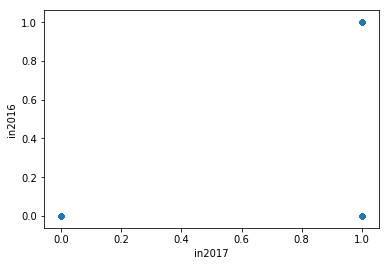

In [4]:
mydata.plot.scatter('in2017','in2016',)
plt.show()

****************************************************************************************************
All Top100 startups in 2017
****************************************************************************************************
Technology
Biotech                    64
Cleantech                  12
Electronics, Mechanics     17
Internet, Mobile           50
Materials, Chemicals        3
Medtech                    64
Micro-, Nano Technology    61
Others                      9
Software                   64
Name: Technology, dtype: int64


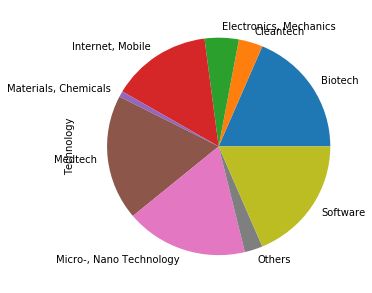

age
0.0      3
1.0     17
2.0     51
3.0    122
4.0    109
5.0     45
Name: age, dtype: int64


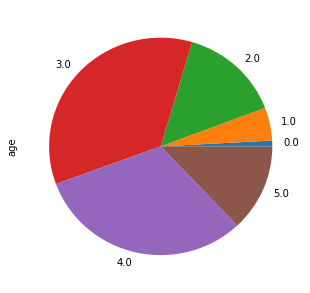

****************************************************************************************************
Freshly picked Top100 startups in 2017
****************************************************************************************************
Technology
Biotech                     7
Cleantech                   2
Electronics, Mechanics      2
Internet, Mobile           11
Materials, Chemicals        3
Medtech                     4
Micro-, Nano Technology    15
Others                      4
Software                    9
Name: in2017, dtype: int64


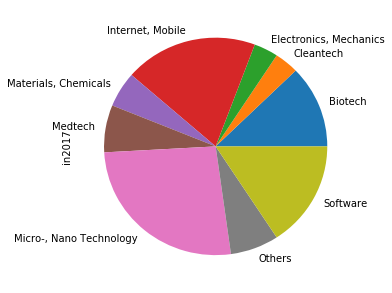

age
0.0     3
1.0     7
2.0    17
3.0    14
4.0    11
5.0     8
Name: age, dtype: int64


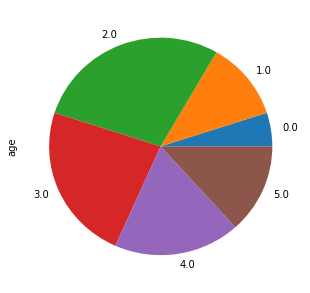

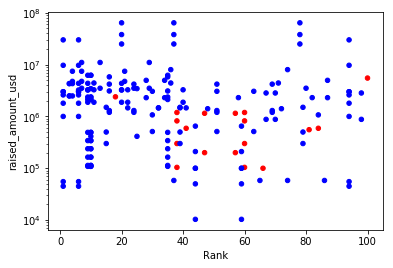

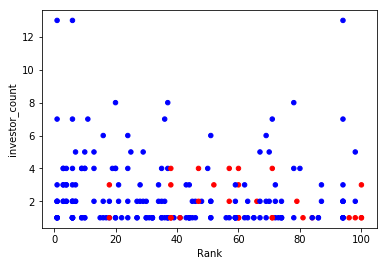

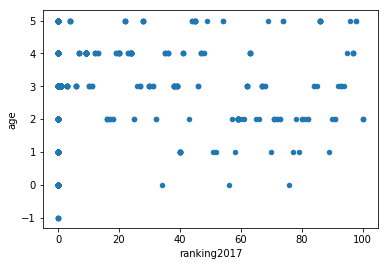

In [5]:
print "*"*100
print "All Top100 startups in 2017"
print "*"*100
df = mydata[(mydata['in2017']==1)].groupby('Technology')['Technology'].count()
print (df)
df.plot.pie(subplots=True,figsize=(5, 5))
plt.show()

df = mydata[(mydata['in2017']==1)].groupby('age')['age'].count()
print (df)
df.plot.pie(subplots=True,figsize=(5, 5))
plt.show()

print "*"*100
print "Freshly picked Top100 startups in 2017"
print "*"*100
df = mydata[(mydata['in2017']==1)&(mydata['in2016']==0)].groupby('Technology')['in2017'].count()
print (df)
df.plot.pie(subplots=True,figsize=(5, 5))
plt.show()

df = mydata[(mydata['in2017']==1)&(mydata['in2016']==0)].groupby('age')['age'].count()
print (df)
df.plot.pie(subplots=True,figsize=(5, 5))
plt.show()

df =all_year_ranking[all_year_ranking.comps.isin(mydata[(mydata['in2017']==1)].comps)]
df.plot.scatter('Rank','raised_amount_usd',c=['r' if i else 'b' for i in df.comps.isin(mydata[(mydata['in2016']==0)].comps)],logy=True,legend=True)
plt.show()
df.plot.scatter('Rank','investor_count',c=['r' if i else 'b' for i in df.comps.isin(mydata[(mydata['in2016']==0)].comps)])
plt.show()

mydata.plot.scatter('ranking2017','age')
plt.show()



          comps  in2017  in2016  in2015  in2014  in2013  in2012 Technology  \
0  workspace2go       0       0       0       0       0       0        NaN   
1      qloudlab       0       0       0       0       0       0    Medtech   
2           ava       1       1       1       0       0       0    Medtech   
3    battronics       0       0       0       0       0       0        NaN   
4      rehaptix       0       0       0       0       0       0    Medtech   

   Number.of.Employees  age  raised_amount_usd  ranking2017  
0                  9.0  1.0                0.0          0.0  
1                  3.0  4.0                0.0          0.0  
2                 38.0  3.0                0.0          1.0  
3                  0.0  1.0                0.0          0.0  
4                  0.0  5.0                0.0          0.0  


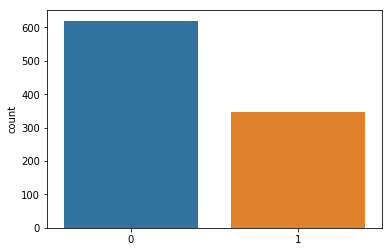

In [6]:
print mydata.head()
y=mydata.in2017.values
x=mydata.iloc[:,[2,3,4,5,6,8,9,10]].values
ax = sns.countplot(y,label="Count")      
plt.show()
feature_names =  [mydata.columns[i] for i in [2,3,4,5,6,8,9,10]]

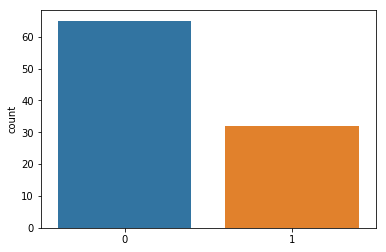

F-score:  [0.97014925 0.93333333]
precision: 0.9999999999999644 recall: 0.8749999999999726


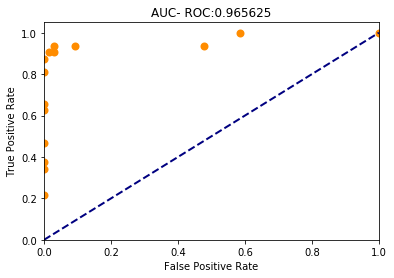

[0.63005285 0.11537793 0.0568775  0.         0.         0.04597491
 0.0086227  0.14309411]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


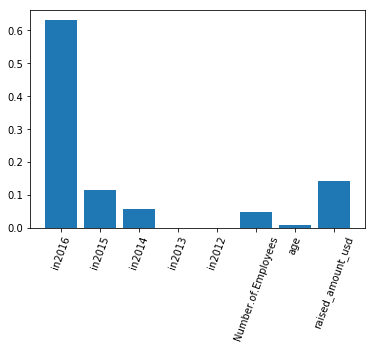

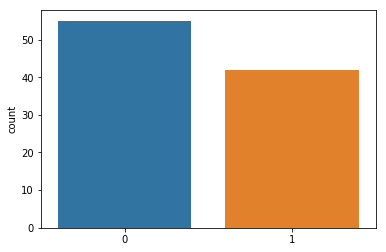

F-score:  [0.94017094 0.90909091]
precision: 0.9999999999999714 recall: 0.8333333333333135


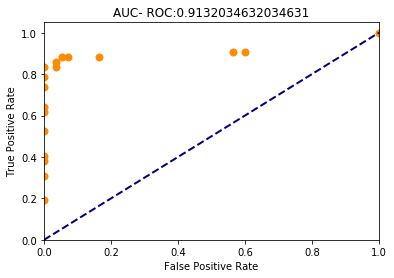

[0.6206005  0.11224718 0.05871232 0.         0.         0.04419912
 0.00594564 0.15829523]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


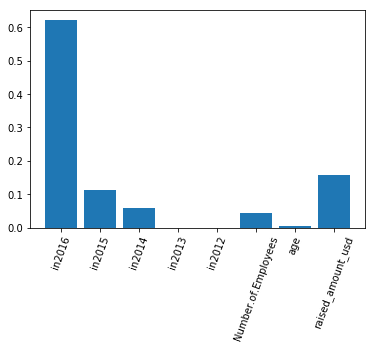

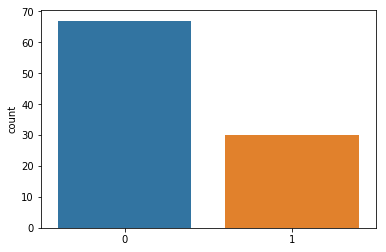

F-score:  [0.97810219 0.94736842]
precision: 0.999999999999963 recall: 0.89999999999997


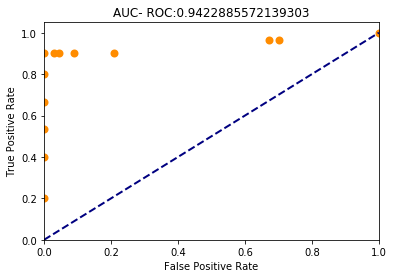

[0.62906554 0.11282637 0.05703177 0.         0.         0.04548878
 0.00658278 0.14900476]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


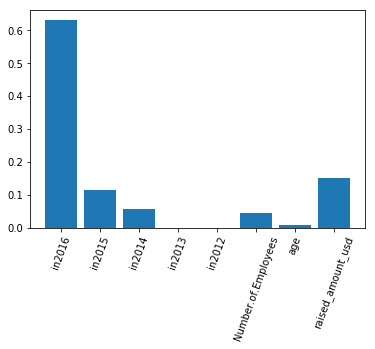

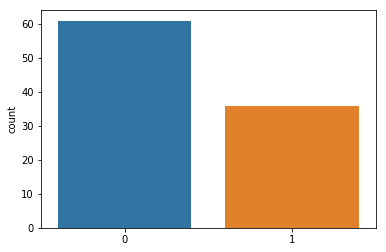

F-score:  [0.976      0.95652174]
precision: 0.9999999999999697 recall: 0.9166666666666412


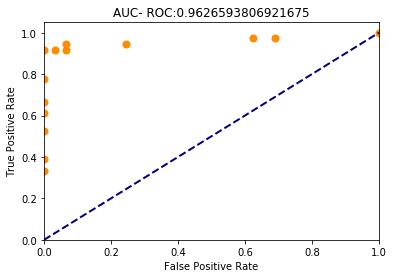

[0.62458081 0.10868426 0.05950137 0.         0.         0.0441549
 0.00776143 0.15531723]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


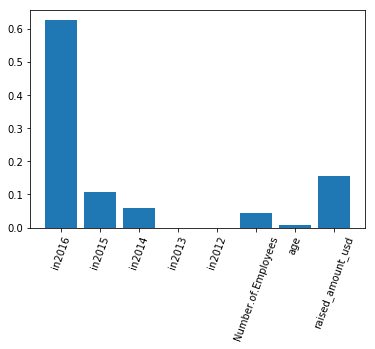

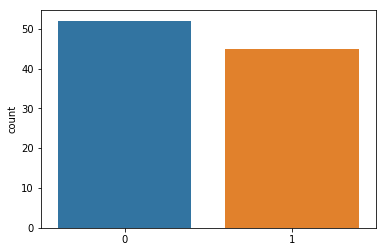

F-score:  [0.94545455 0.92857143]
precision: 0.9999999999999744 recall: 0.8666666666666474


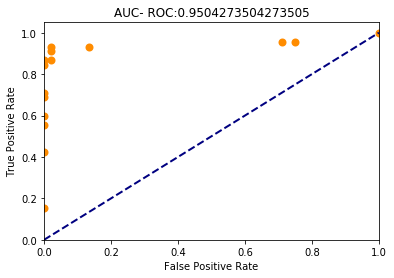

[0.62521389 0.11063244 0.06586636 0.         0.         0.03753045
 0.0086233  0.15213357]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


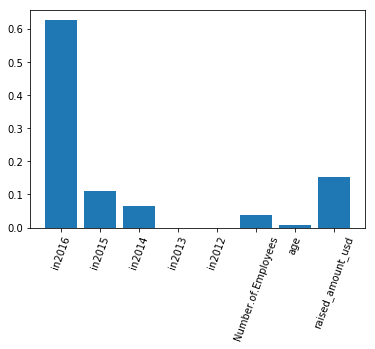

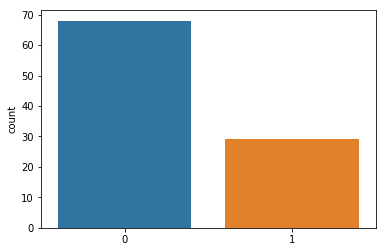

F-score:  [0.96453901 0.90566038]
precision: 0.9999999999999584 recall: 0.8275862068965232


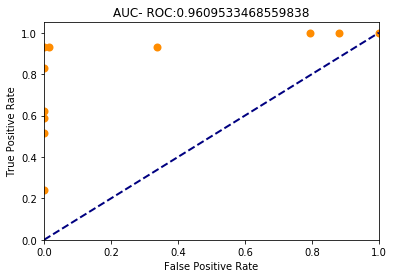

[0.62230212 0.11379665 0.06229446 0.         0.         0.03968795
 0.00835948 0.15355934]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


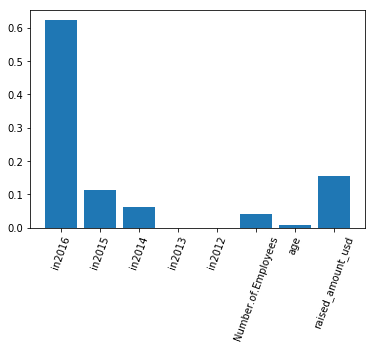

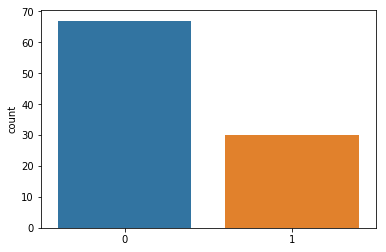

F-score:  [0.98529412 0.96551724]
precision: 0.9999999999999644 recall: 0.9333333333333023


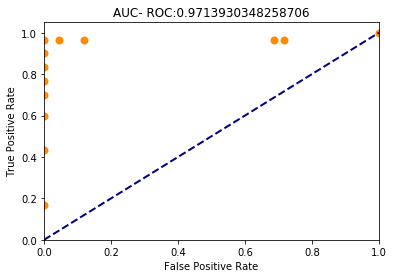

[0.62337487 0.11415561 0.06446259 0.         0.         0.03679597
 0.00733136 0.1538796 ]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


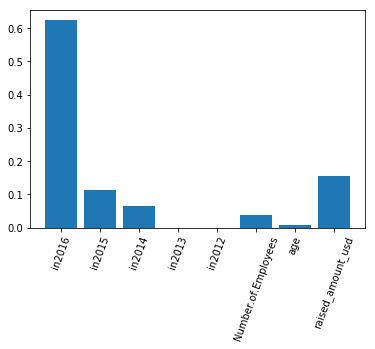

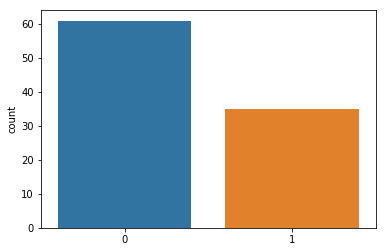

F-score:  [0.93846154 0.87096774]
precision: 0.999999999999963 recall: 0.7714285714285494


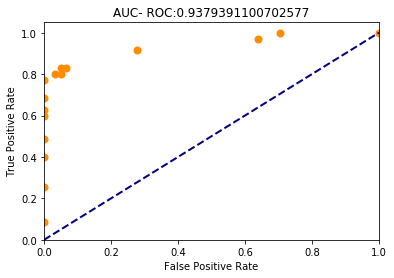

[0.6161768  0.11337012 0.06857411 0.         0.         0.03234814
 0.00486705 0.16466378]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


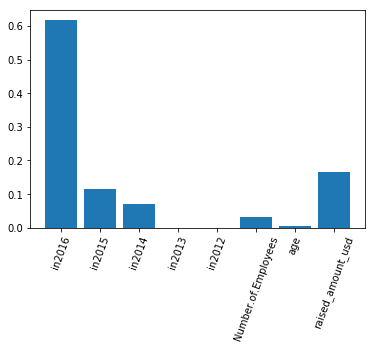

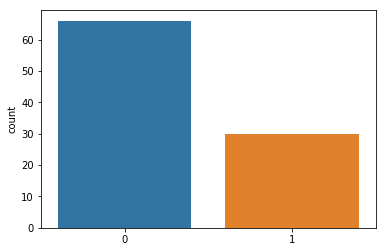

F-score:  [0.97777778 0.94736842]
precision: 0.999999999999963 recall: 0.89999999999997


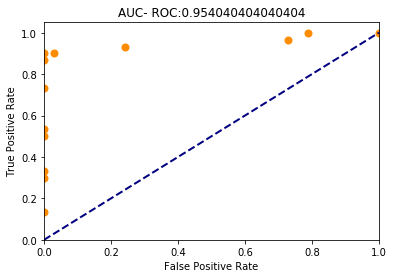

[0.6142732  0.11520743 0.06702985 0.         0.         0.03449878
 0.00729736 0.16169337]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


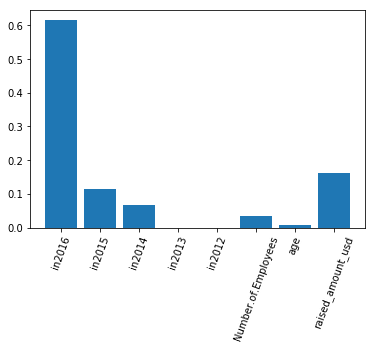

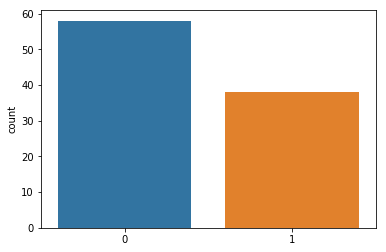

F-score:  [0.95867769 0.92957746]
precision: 0.9999999999999697 recall: 0.868421052631556


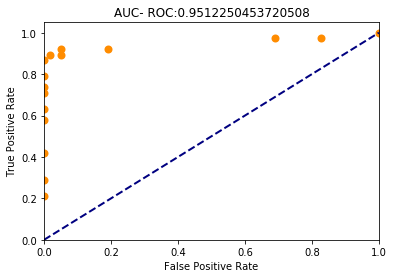

[0.62335383 0.11260363 0.06545286 0.         0.         0.03679109
 0.00734525 0.15445334]
['in2016', 'in2015', 'in2014', 'in2013', 'in2012', 'Number.of.Employees', 'age', 'raised_amount_usd']


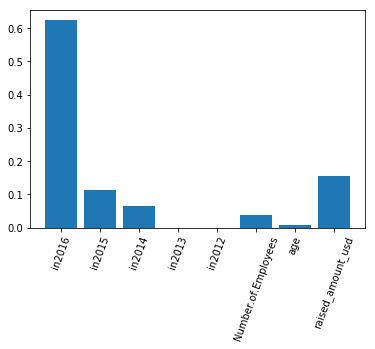

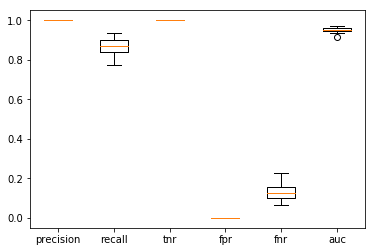

[1.         0.86924358 1.         0.         0.13075642 0.95097547]


In [7]:
### in top100 or not classification
from sklearn.model_selection import KFold
from sklearn import svm
kf = KFold(n_splits=10)
acc_scores=[]
for train_index, test_index in kf.split(x):

    y_test= y[test_index]
    ax = sns.countplot(y_test,label="Count")      
    plt.show()

#     clf = svm.SVC(probability=True,kernel='linear')
    clf  = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x[train_index], y[train_index])
    y_pred = clf.predict(x[test_index])
    y_score = clf.predict_proba(x[test_index])
    print "F-score: " ,f1_score(y_test, y_pred,average=None)

    pc=1
    nc=0
    tp = sum(y_pred[y_test==pc]==pc)
    fn = sum(y_pred[y_test==pc]==nc)
    fp = sum(y_pred[y_test==nc]==pc)
    tn = sum(y_pred[y_test==nc]==nc)
    
    ep=0.000000000001
    pr = tp/float(tp+fp+ep)
    rec = tp/float(tp+fn+ep)
    fpr, tpr, thresholds = roc_curve(y_test,y_score[:,1],pos_label=1)

    roc_auc = auc(fpr, tpr)
    print 'precision:', pr, 'recall:',rec
    acc_scores.append([pr,rec,tn/float(tn+fp+ep),fp/float(tn+fp+ep),fn/float(tp+fn+ep),roc_auc])
    
    
    plt.scatter(fpr,tpr,label='ROC curve (area = %0.2f)'%roc_auc,color='darkorange',lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC- ROC:'+str(roc_auc))

    plt.show()
    print     clf.feature_importances_
    plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)
    print feature_names
    plt.xticks(range(len(clf.feature_importances_)),feature_names,rotation=70)
    plt.show()

plt.boxplot(np.array(acc_scores),labels=['precision','recall','tnr','fpr','fnr','auc'])
plt.show()
print np.nanmean(np.array(acc_scores),0)

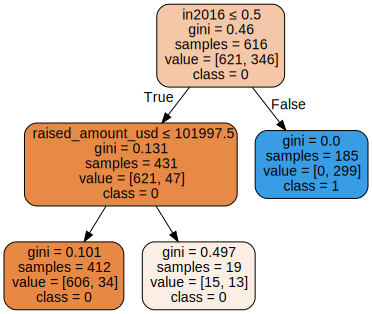

In [15]:
from sklearn import tree
import graphviz 


tree.export_graphviz(clf.estimators_[0], out_file='top100.dot',feature_names=feature_names,  
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True) 

dot_data =tree.export_graphviz(clf.estimators_[0], out_file=None,  
                         feature_names=feature_names,  
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 



accuracy score ( R^2 ):  -0.004413645870029903
MSE: -0.0044
accuracy score ( R^2 ):  -0.014936221974824582
MSE: -0.0149
accuracy score ( R^2 ):  -0.10978507669419278
MSE: -0.1098
accuracy score ( R^2 ):  -0.05747930459555528
MSE: -0.0575
accuracy score ( R^2 ):  -0.013862452478636378
MSE: -0.0139
accuracy score ( R^2 ):  -0.021794718171451732
MSE: -0.0218
accuracy score ( R^2 ):  -0.023344366636899316
MSE: -0.0233
accuracy score ( R^2 ):  0.0065020361324987785
MSE: 0.0065
accuracy score ( R^2 ):  -0.9812166672917065
MSE: -0.9812
accuracy score ( R^2 ):  0.01855490350577582
MSE: 0.0186


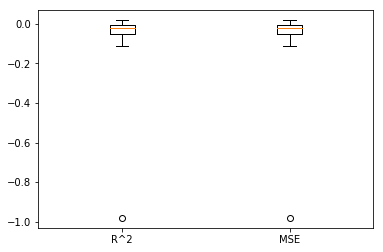

[-0.12017755 -0.12017755]


In [262]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#### predict ranking
y=mydata['ranking2017'].values


kf = KFold(n_splits=10)
acc_scores=[]
for train_index, test_index in kf.split(x):
    

    y_test= y[test_index]
  

    regr = RandomForestRegressor(max_depth=2, random_state=0)
    regr.fit(x[train_index], y[train_index])
    y_pred = regr.predict(x[test_index])
    r2 = regr.score(x[test_index], y_test)
    print "accuracy score ( R^2 ): " ,r2
    mse = r2_score(y_test, y_pred)
    print("MSE: %.4f" % mse)

   
    acc_scores.append([r2,mse])
    
    
    

plt.boxplot(np.array(acc_scores),labels=['R^2','MSE'])
plt.show()
print np.nanmean(np.array(acc_scores),0)